In [1]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gen=ImageDataGenerator(rescale=1./255)
train_data=train_gen.flow_from_directory('data/train',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True) 
test_gen=ImageDataGenerator(rescale=1./255)
test_data=test_gen.flow_from_directory('data/val',target_size=(128,128),batch_size=1,class_mode='categorical',shuffle=False)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.fit(train_data,epochs=10,batch_size = 64)

Epoch 1/10
458/458 [==============================] - 224s 486ms/step - loss: 0.5353 - accuracy: 0.7541
Epoch 2/10
458/458 [==============================] - 167s 365ms/step - loss: 0.1440 - accuracy: 0.9506
Epoch 3/10
458/458 [==============================] - 167s 365ms/step - loss: 0.0820 - accuracy: 0.9727
Epoch 4/10
458/458 [==============================] - 167s 363ms/step - loss: 0.0669 - accuracy: 0.9757
Epoch 5/10
458/458 [==============================] - 167s 365ms/step - loss: 0.0420 - accuracy: 0.9857
Epoch 6/10
458/458 [==============================] - 167s 365ms/step - loss: 0.0402 - accuracy: 0.9863
Epoch 7/10
458/458 [==============================] - 167s 365ms/step - loss: 0.0390 - accuracy: 0.9869
Epoch 8/10
458/458 [==============================] - 167s 365ms/step - loss: 0.0237 - accuracy: 0.9916
Epoch 9/10
458/458 [==============================] - 167s 364ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 10/10
458/458 [==============================] - 167s 364m

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [8]:
pred=model.predict(test_data).argmax(axis=1)

1500/1500 [==============================] - 15s 10ms/step


In [9]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report(pred ,test_data.classes ))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       509
           1       0.98      0.98      0.98       500
           2       0.96      0.98      0.97       491

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [11]:
print(classification_report(pred ,test_data.classes ))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       509
           1       0.98      0.98      0.98       500
           2       0.96      0.98      0.97       491

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = 'test/cat.jpg'
image_path2 = 'test/dog.jpg'
image_path3 = 'test/dog2.jpg'
image_path4 = 'test/wild.jpg'
image_path5 = 'test/wild2.jpg'

In [31]:
img = image.load_img(image_path, target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

img2 = image.load_img(image_path2, target_size=(128, 128))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = img2 / 255.0

img3 = image.load_img(image_path3, target_size=(128, 128))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
img3 = img3 / 255.0

img4 = image.load_img(image_path4, target_size=(128, 128))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
img4 = img4 / 255.0

img5 = image.load_img(image_path5, target_size=(128, 128))
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5, axis=0)
img5 = img5 / 255.0

In [32]:
prediction = model.predict(img)
class_labels = train_data.class_indices 
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(prediction.argmax())]

1/1 [==============================] - 0s 17ms/step


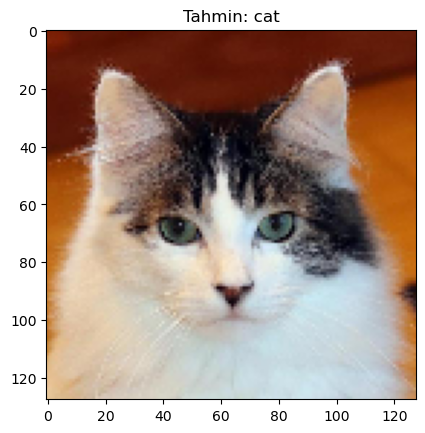

In [33]:
plt.imshow(img[0])
plt.title("Tahmin: " + predicted_class)
plt.show()

In [35]:
prediction = model.predict(img2)
class_labels = train_data.class_indices 
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(prediction.argmax())]

1/1 [==============================] - 0s 20ms/step


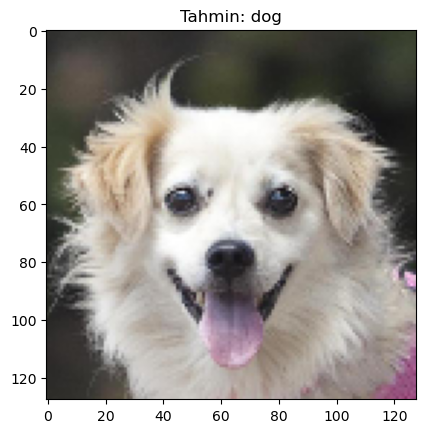

In [38]:
plt.imshow(img2[0])
plt.title("Tahmin: " + predicted_class)
plt.show()

In [39]:
prediction = model.predict(img3)
class_labels = train_data.class_indices 
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(prediction.argmax())]

1/1 [==============================] - 0s 18ms/step


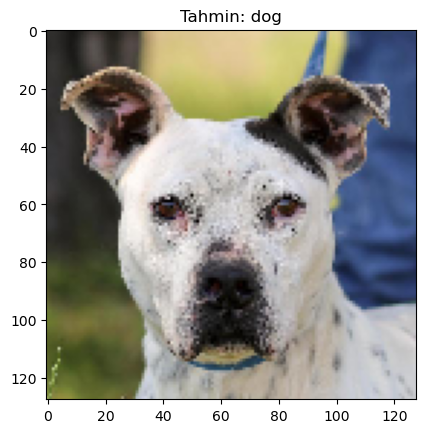

In [40]:
plt.imshow(img3[0])
plt.title("Tahmin: " + predicted_class)
plt.show()

In [41]:
prediction = model.predict(img4)
class_labels = train_data.class_indices 
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(prediction.argmax())]

1/1 [==============================] - 0s 19ms/step


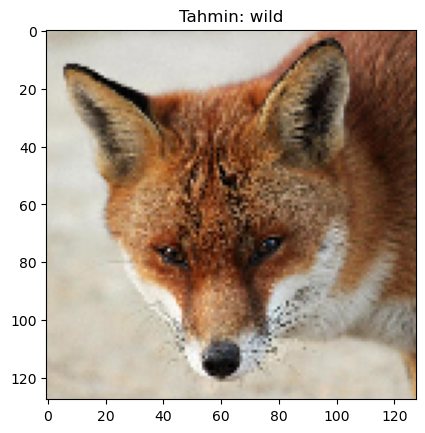

In [42]:
plt.imshow(img4[0])
plt.title("Tahmin: " + predicted_class)
plt.show()

In [43]:
prediction = model.predict(img5)
class_labels = train_data.class_indices 
predicted_class = list(class_labels.keys())[list(class_labels.values()).index(prediction.argmax())]

1/1 [==============================] - 0s 18ms/step


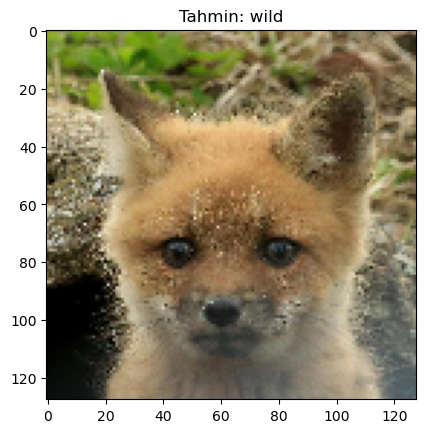

In [44]:
plt.imshow(img5[0])
plt.title("Tahmin: " + predicted_class)
plt.show()